In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.datasets import mnist
from keras import backend as K

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline
np.random.seed(411)

In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Text(0.5,1,'Ground Truth : 7')

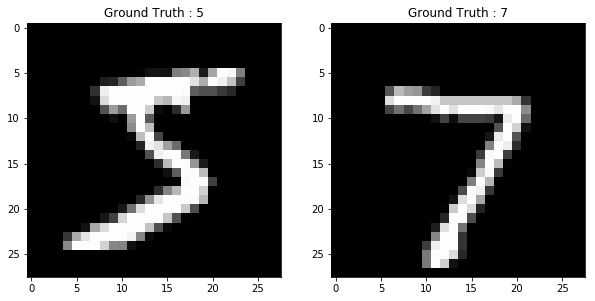

In [6]:
plt.figure(figsize=[10,5])
 
# display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))
 
# display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [7]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [8]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train /= 255 # for gray scale image
X_test /= 255

In [11]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples') # 6000 for each images
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Build Model

#### Traditional Neural Network

In [13]:
# change from matrix to array of dimension 28x28 to array of dimention 784
dim_data = np.prod(X_train.shape[1:])
train_data = X_train.reshape(X_train.shape[0], dim_data)
test_data = X_test.reshape(X_test.shape[0], dim_data)

In [14]:
model_nn = Sequential()

In [15]:
model_nn.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(num_classes, activation='softmax'))

In [16]:
model_nn.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
train_data.shape, y_train.shape

((60000, 784), (60000, 10))

In [19]:
test_data.shape, y_test.shape

((10000, 784), (10000, 10))

In [20]:
history_nn = model_nn.fit(train_data, y_train, batch_size=256, epochs=20, verbose=True, 
                    validation_data=(test_data, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.4014 - acc: 0.8753 - val_loss: 0.1427 - val_acc: 0.9552
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1725 - acc: 0.9466 - val_loss: 0.0969 - val_acc: 0.9699
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1326 - acc: 0.9603 - val_loss: 0.0836 - val_acc: 0.9748
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.1106 - acc: 0.9656 - val_loss: 0.0721 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0942 - acc: 0.9702 - val_loss: 0.0696 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0821 - acc: 0.9746 - val_loss: 0.0678 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0777 - acc: 0.9758 - val_loss: 0.0619 - 

In [21]:
score = model_nn.evaluate(test_data, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 109us/step
Test loss: 0.05967734447972289
Test accuracy: 0.9837


Text(0.5,1,'Loss Curves')

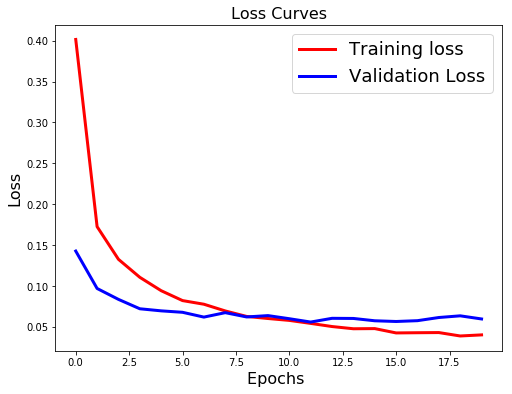

In [22]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_nn.history['loss'],'r',linewidth=3.0)
plt.plot(history_nn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

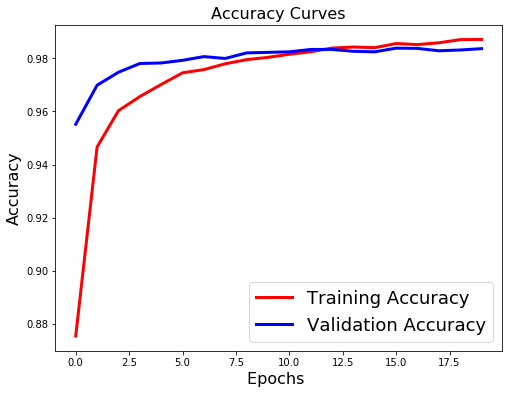

In [23]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_nn.history['acc'],'r',linewidth=3.0)
plt.plot(history_nn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [24]:
# try to predict class
model_nn.predict_classes(test_data[[3],:])

array([0])

In [25]:
# try to predict probabilities
model_nn.predict(test_data[[3],:])

array([[9.99947071e-01, 6.79281908e-10, 1.48681139e-07, 1.32736995e-08,
        5.53457880e-07, 8.48259134e-08, 5.09904821e-05, 1.01555617e-08,
        1.55795625e-08, 1.00316095e-06]], dtype=float32)

#### Convolutional Neural Network

In [26]:
model_cnn = Sequential()

In [27]:
# input layer
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

In [28]:
# convolution layers
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.5))

# fully connected dense layers
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0,5))

In [29]:
# output layer
model_cnn.add(Dense(num_classes, activation='softmax'))

In [30]:
model_cnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [31]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [32]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [33]:
X_test.shape, y_test.shape

((10000, 28, 28, 1), (10000, 10))

In [34]:
history_cnn = model_cnn.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=True, validation_data=(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 240s 4ms/step - loss: 0.1302 - acc: 0.9598 - val_loss: 0.0524 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0493 - acc: 0.9845 - val_loss: 0.0394 - val_acc: 0.9874
Epoch 3/10
60000/60000 [==============================] - 211s 4ms/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0368 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0272 - acc: 0.9917 - val_loss: 0.0425 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0232 - acc: 0.9917 - val_loss: 0.0420 - val_acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0179 - acc: 0.9939 - val_loss: 0.0338 - val_acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0157 - acc: 0.9947 - val_loss: 0.0329 - 

In [35]:
score = model_cnn.evaluate(X_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 941us/step
Test loss: 0.0397558282849393
Test accuracy: 0.9907


Text(0.5,1,'Loss Curves')

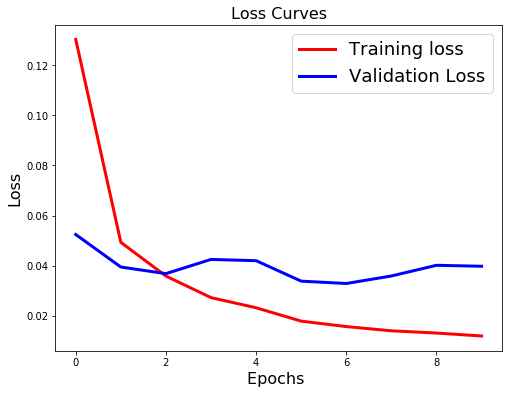

In [36]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn.history['loss'],'r',linewidth=3.0)
plt.plot(history_cnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

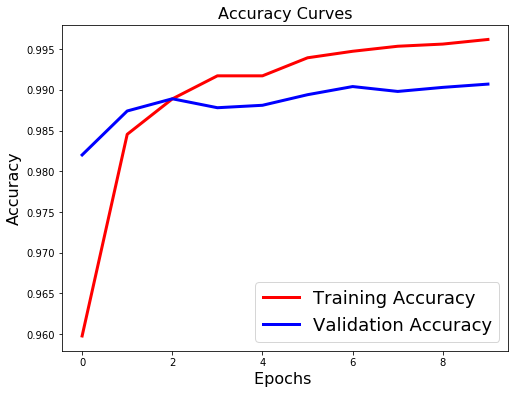

In [37]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn.history['acc'],'r',linewidth=3.0)
plt.plot(history_cnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Save Model

#### Neural Network

In [38]:
# serialize model to JSON
model_nn_json = model_nn.to_json()
with open("weights/model_nn.json", "w") as json_file:
    json_file.write(model_nn_json)
    
# serialize weights to HDF5
model_nn.save_weights("weights/model_nn.h5")
print("Model saved to disk...")

Model saved to disk...


#### Convolution Neural Network

In [39]:
# serialize model to JSON
model_cnn_json = model_cnn.to_json()
with open("weights/model_nn.json", "w") as json_file:
    json_file.write(model_cnn_json)
    
# serialize weights to HDF5
model_cnn.save_weights("weights/model_cnn.h5")
print("Model saved to disk...")

Model saved to disk...


</hr>